* IBM sample datasets
https://www.kaggle.com/blastchar/telco-customer-churn

* Demographic info: 
    * Gender, SeniorCitizen, Partner, Dependents
* Services subscribed: 
    * PhoneService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
* Customer account info:
    * CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## load dataset

In [3]:
df = pd.read_csv("data/telco.csv")
df.shape

(7043, 21)

In [4]:
pd.options.display.max_columns = 22

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### describe

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,1709-EJDOX,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### 수치형 데이터 시각화

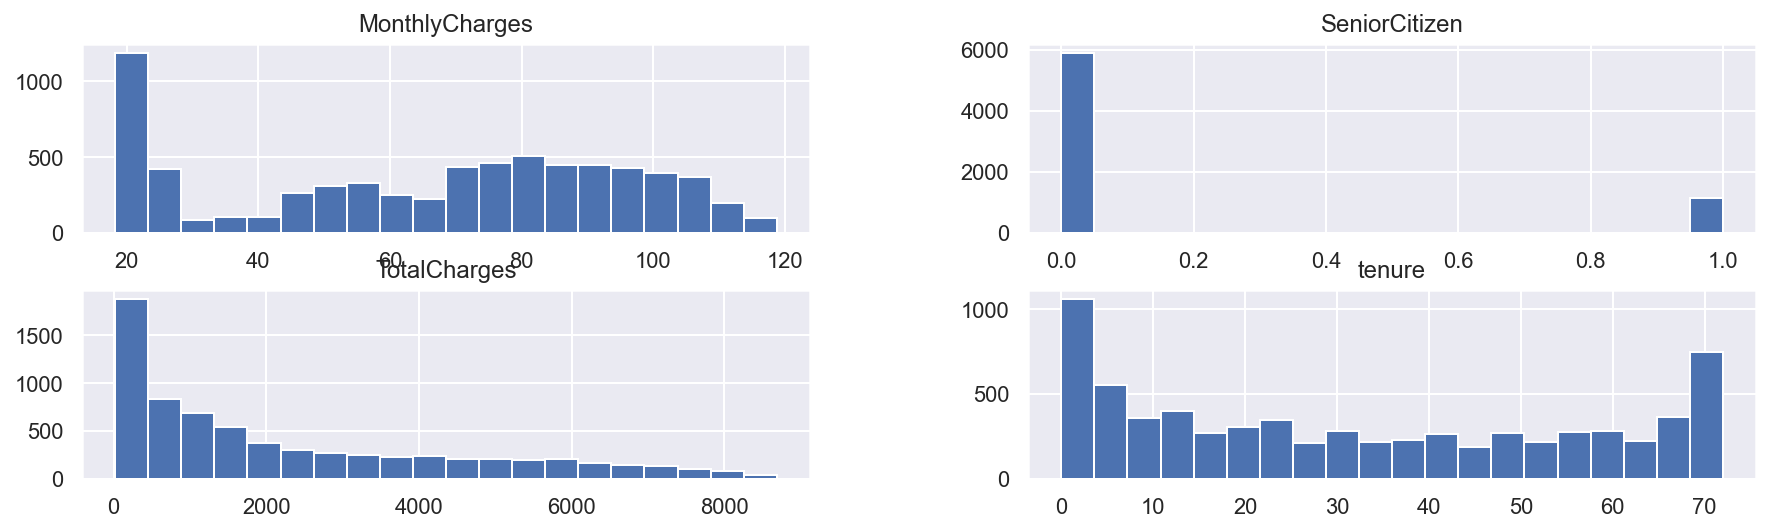

In [12]:
h = df.hist(bins=20, figsize=(15, 4))

In [13]:
df.shape

(7043, 21)

In [14]:
# 수치형 데이터만 가져와서 시각화를 할 수 있도록 na 값을 제거하고 df_numeric 이라는 변수에 담습니다.
df_numeric = df.select_dtypes(exclude="object").copy()
df_numeric["Churn"] = df["Churn"]
df_numeric = df_numeric.dropna()
df_numeric.shape

(7032, 5)

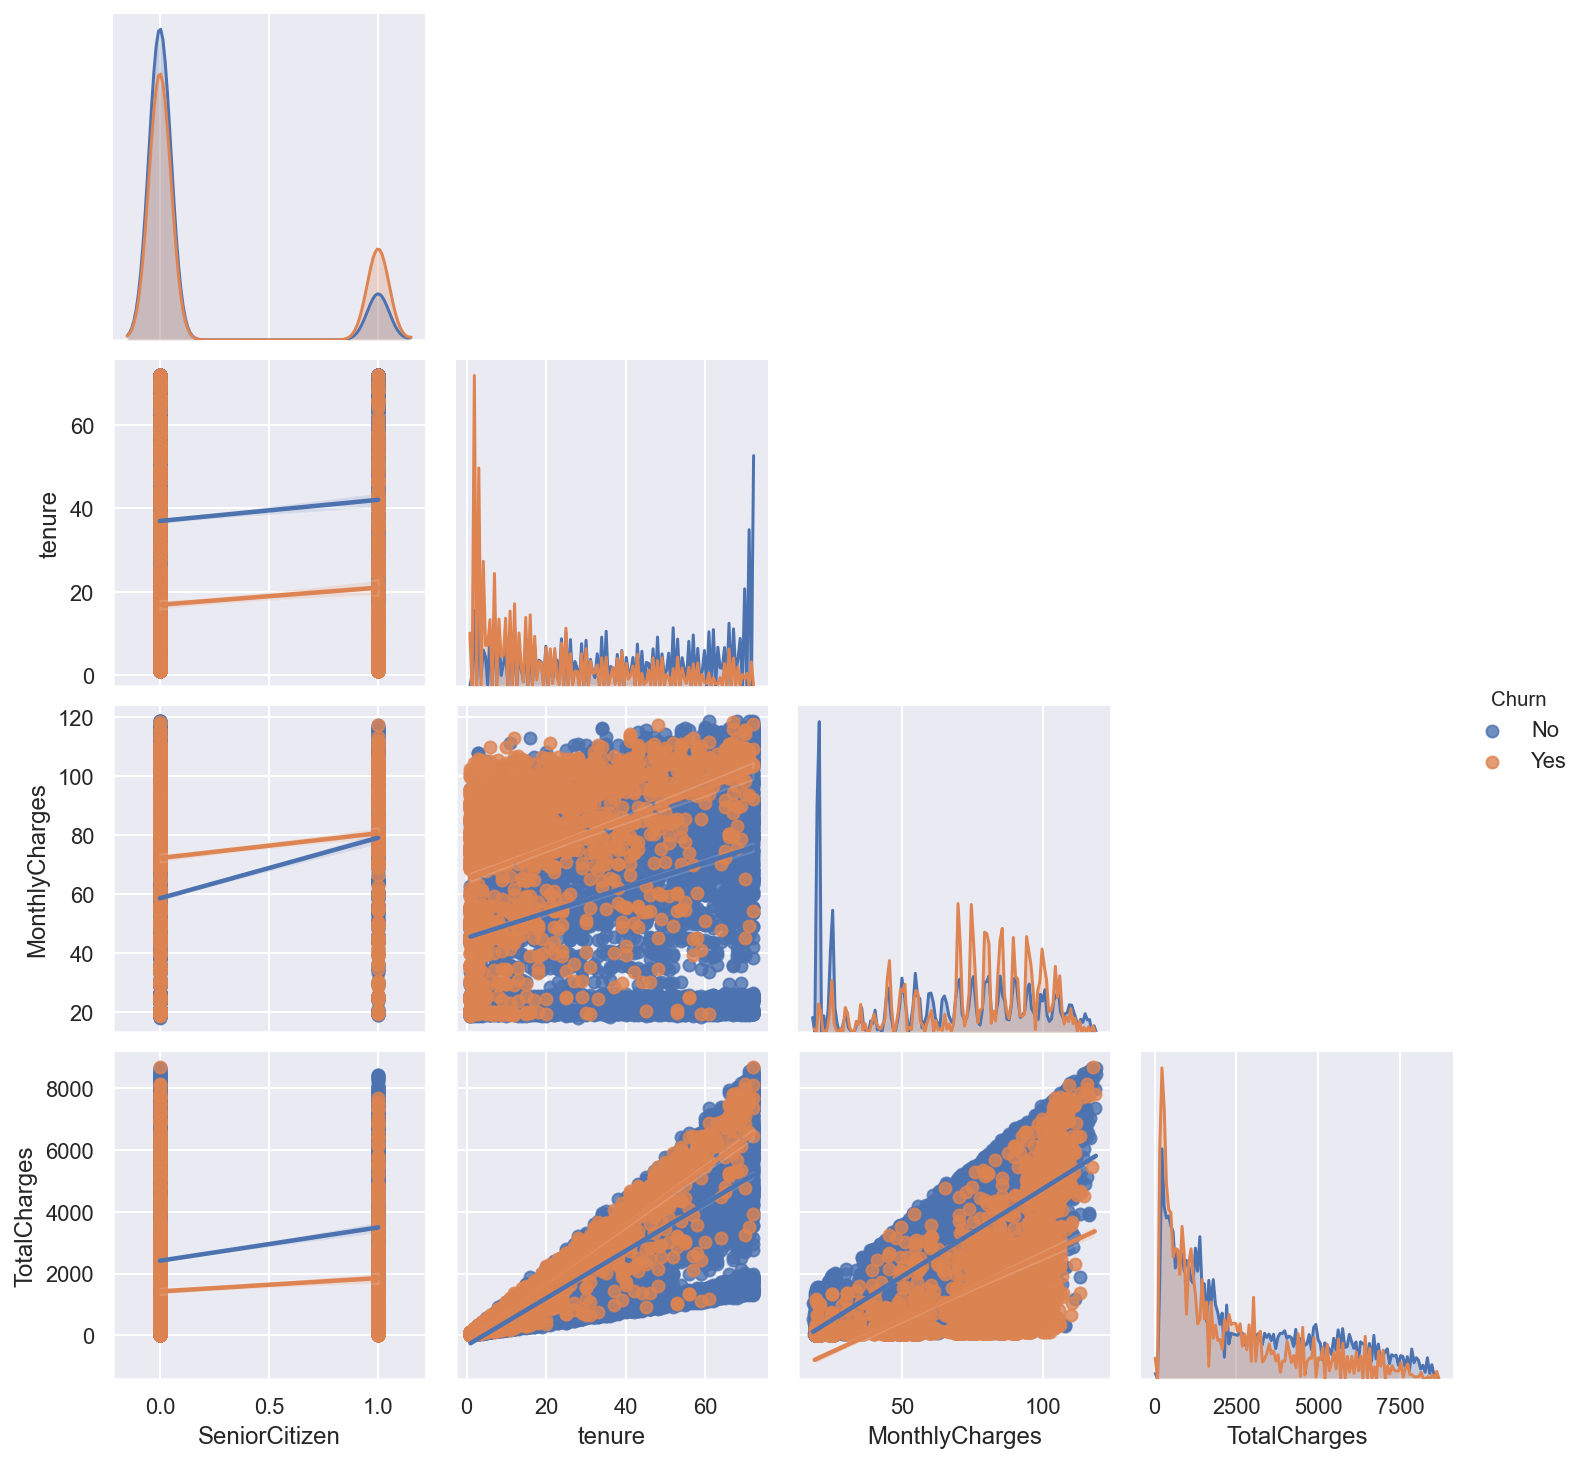

In [15]:
sns.pairplot(df_numeric, hue="Churn", diag_kws={"bw":.05}, kind='reg', corner=True)

### 범주형 데이터 시각화

In [16]:
nunique = df.nunique()
nunique

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [17]:
category_col = nunique[nunique < 10]
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [18]:
bi_category = nunique[nunique < 3]
bi_cols = bi_category.index.tolist()
bi_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

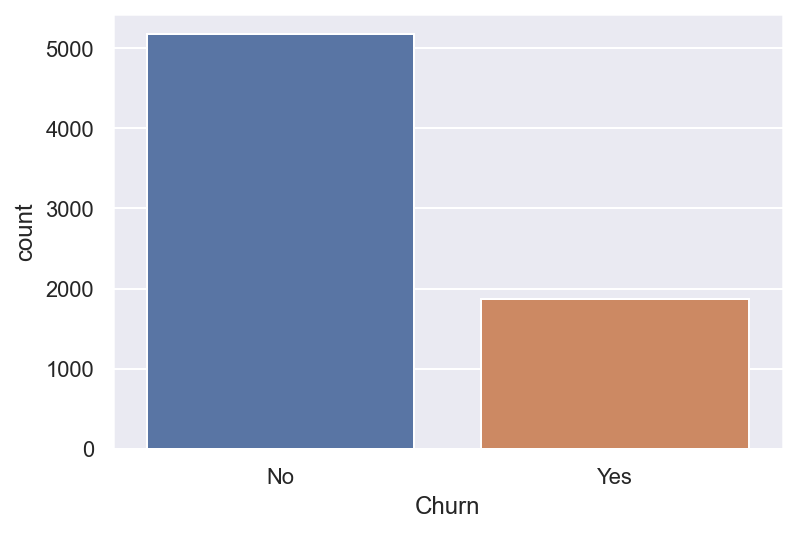

In [19]:
sns.countplot(data=df, x="Churn")

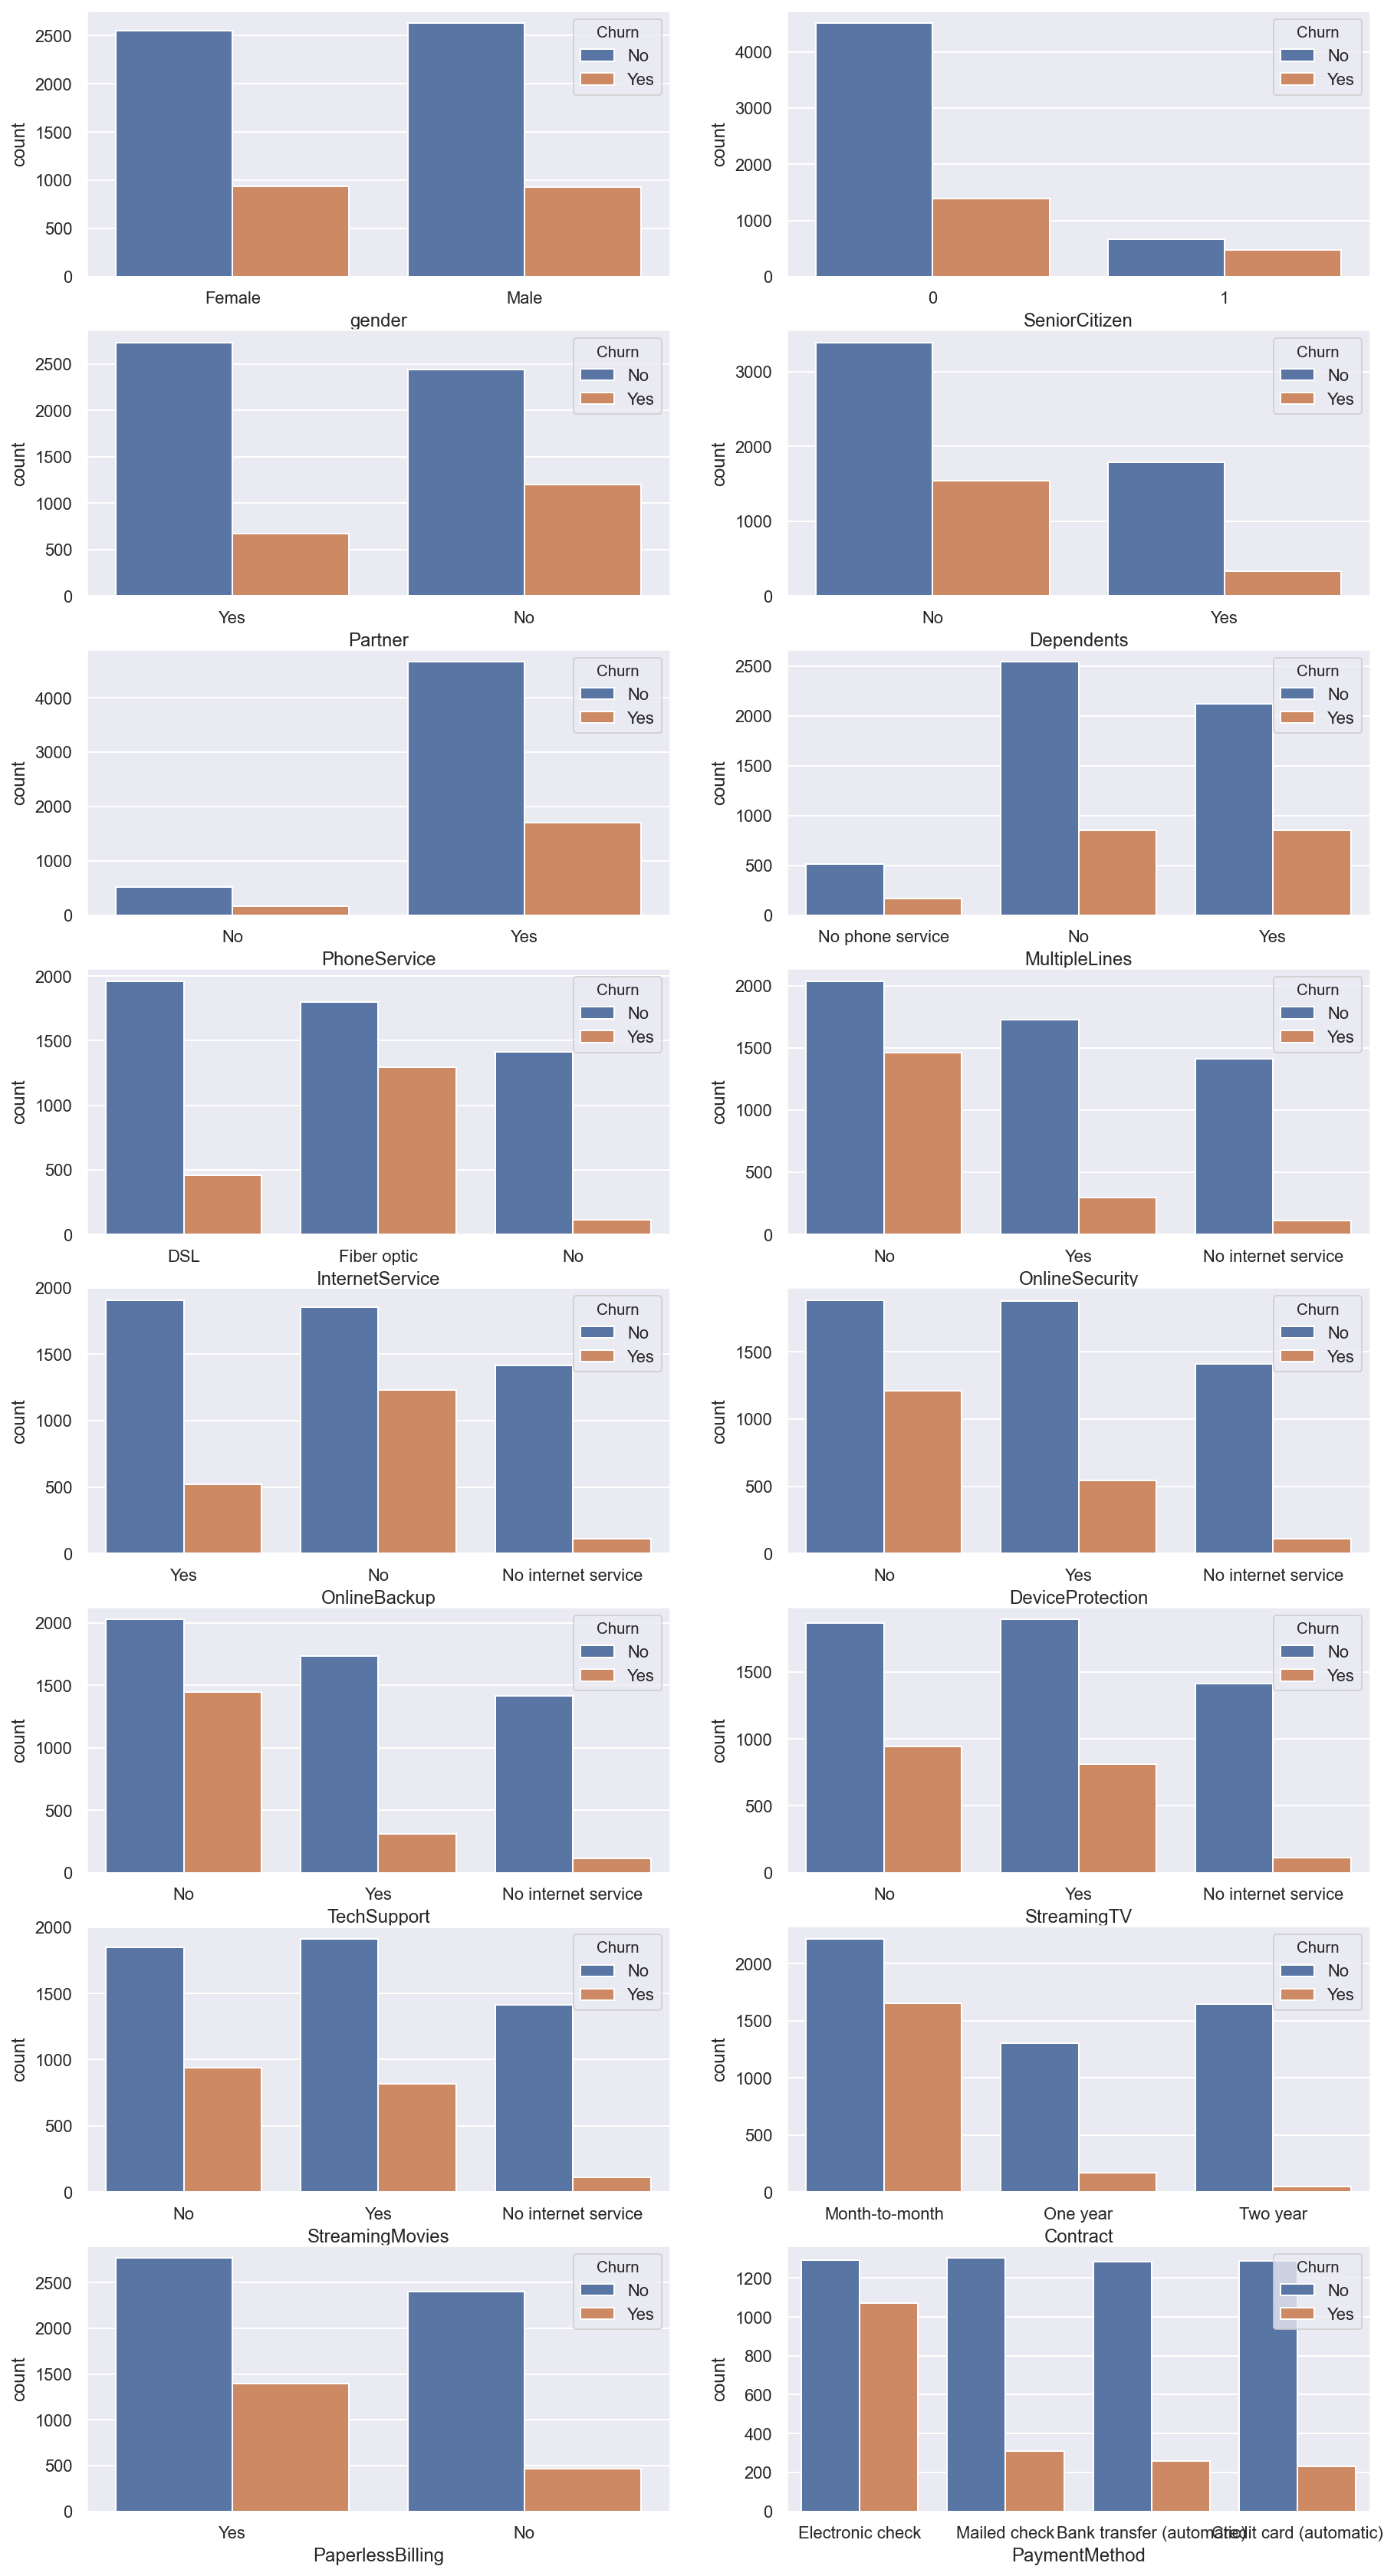

In [20]:
category_col_name = category_col.index.tolist()
col_len = len(category_col_name)

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 30))
for i, cat_col in enumerate(category_col_name[:-1]):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, x=cat_col, hue="Churn", ax=axes[row, col])

In [21]:
df[bi_cols].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,Female,0,Yes,No,No,Yes,No
1,Male,0,No,No,Yes,No,No
2,Male,0,No,No,Yes,Yes,Yes
3,Male,0,No,No,No,No,No
4,Female,0,No,No,Yes,Yes,Yes


In [22]:
df["gender"] = df["gender"] == "Male"
df["Partner"] = df["Partner"] == "Yes"
df["Dependents"] = df["Dependents"] == "Yes"
df["PhoneService"] = df["PhoneService"] == "Yes"
df["PaperlessBilling"] = df["PaperlessBilling"] == "Yes"
df["Churn"] = df["Churn"] == "Yes"

In [23]:
df[bi_cols].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,False,0,True,False,False,True,False
1,True,0,False,False,True,False,False
2,True,0,False,False,True,True,True
3,True,0,False,False,False,False,False
4,False,0,False,False,True,True,True


In [24]:
df.groupby(bi_cols)

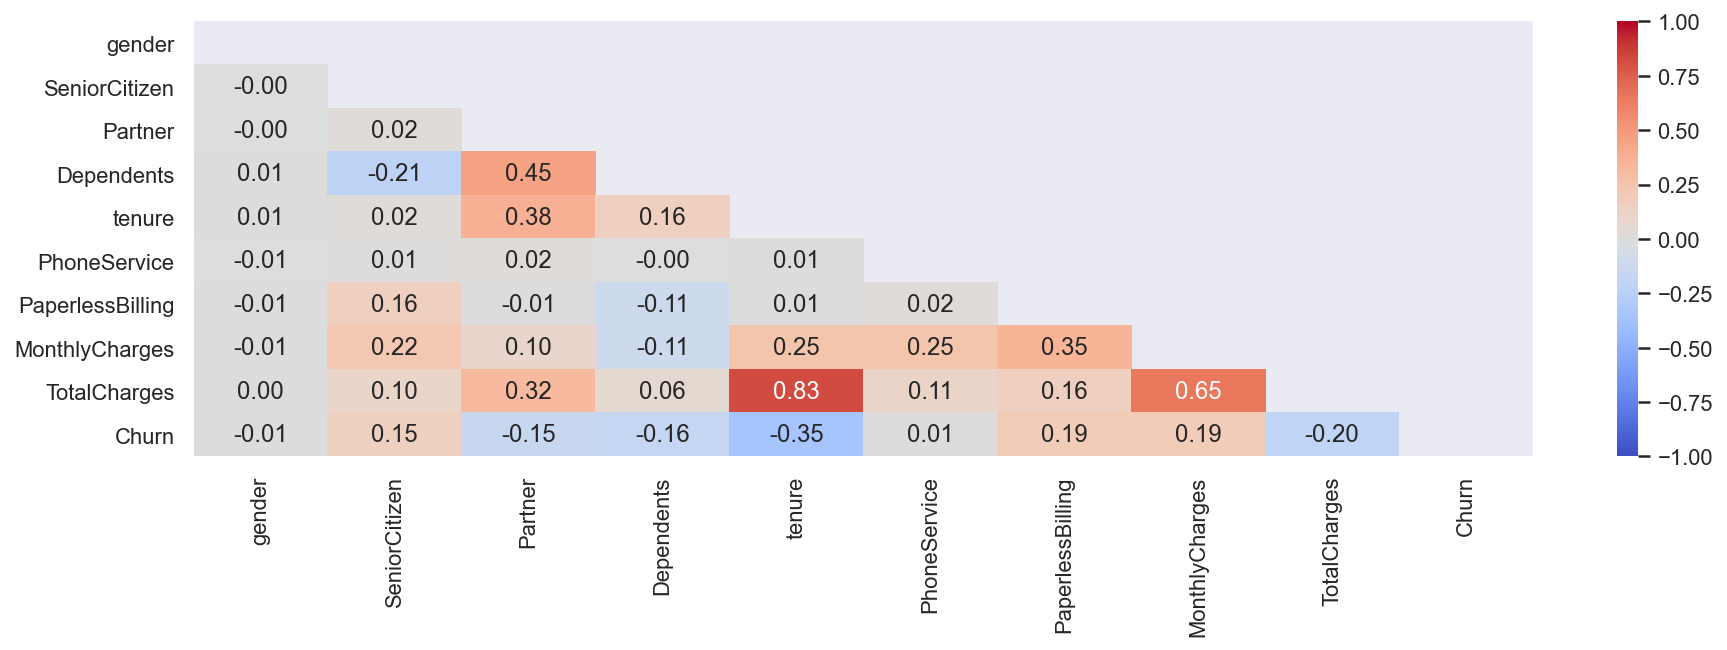

In [25]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(15, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,mask=mask)

In [26]:
nunique

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

### binning

In [27]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

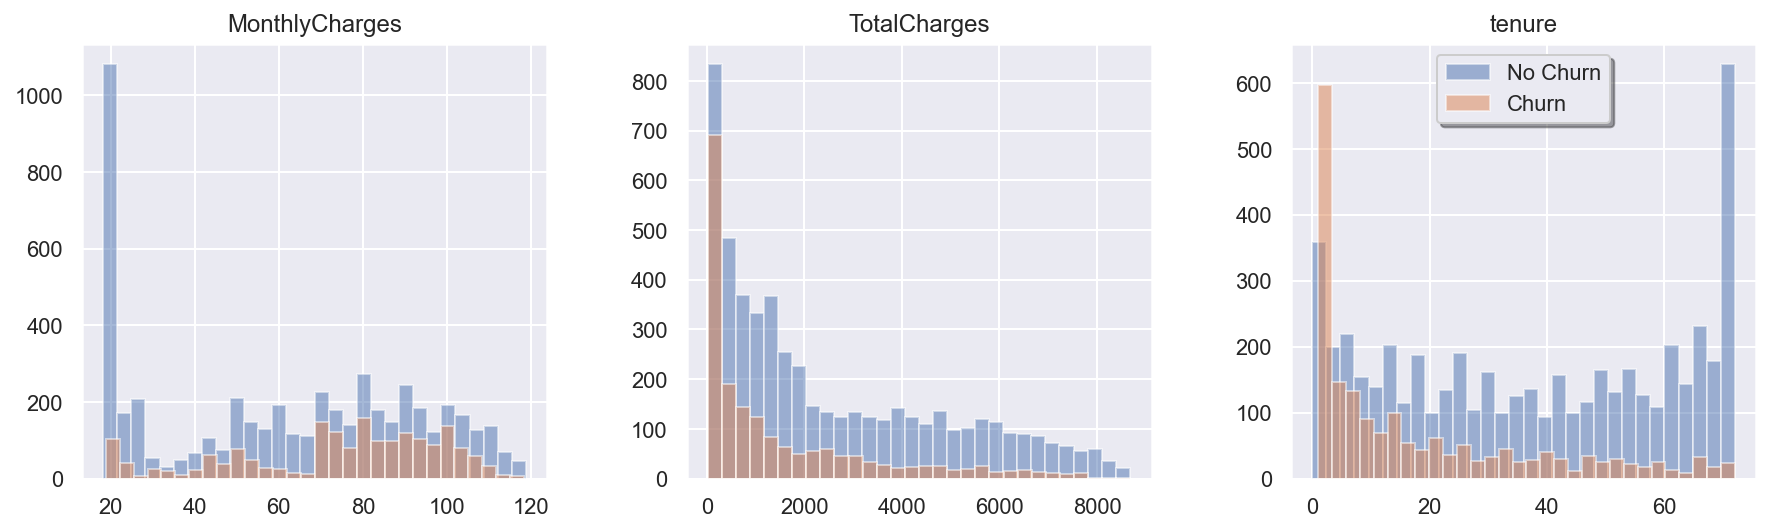

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
df.loc[df["Churn"] == False, num_cols].hist(bins=30, alpha=.5, ax=axes)
df.loc[df["Churn"] == True, num_cols].hist(bins=30, alpha=.5, ax=axes)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=9)

In [29]:
## MonthlyCharges 를 qcut을 통해 나눕니다.
pd.qcut(df["MonthlyCharges"], q=4, labels=["<35", "<70", "<89", "<119"])

0        <35
1        <70
2        <70
3        <70
4        <89
        ... 
7038     <89
7039    <119
7040     <35
7041     <89
7042    <119
Name: MonthlyCharges, Length: 7043, dtype: category
Categories (4, object): [<35 < <70 < <89 < <119]

In [30]:
# monthlycharges_split 을 30, 70, 100  범위로 나눕니다.
def monthlycharges_split(df) :   
    if df['MonthlyCharges'] <= 30 :
        return '0-30'
    elif (df['MonthlyCharges'] > 30) & (df['MonthlyCharges'] <= 70 ):
        return '30-70'
    elif (df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] <= 99 ):
        return '70-99'
    elif df['MonthlyCharges'] > 99 :
        return '99plus'
    
df['monthlycharges_group'] = df.apply(monthlycharges_split, axis = 1)

In [31]:
# TotalCharges 를 2000, 4000, 6000 으로 나눕니다.
def totalcharges_split(df) :   
    if df['TotalCharges'] <= 2000 :
        return '0-2k'
    elif (df['TotalCharges'] > 2000) & (df['TotalCharges'] <= 4000 ):
        return '2k-4k'
    elif (df['TotalCharges'] > 4000) & (df['TotalCharges'] <= 6000) :
        return '4k-6k'
    elif df['TotalCharges'] > 6000 :
        return '6kplus'
df['totalcharges_group'] = df.apply(totalcharges_split, axis = 1)

In [32]:
# tenure 를 20, 40, 60 으로 나눕니다.
def tenure_split(df) :   
    if df['tenure'] <= 20 :
        return '0-20'
    elif (df['tenure'] > 20) & (df['tenure'] <= 40 ):
        return '20-40'
    elif (df['tenure'] > 40) & (df['tenure'] <= 60) :
        return '40-60'
    elif df['tenure'] > 60 :
        return '60plus'
df['tenure_group'] = df.apply(tenure_split, axis = 1)

In [33]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [34]:
cat_cols = nunique[( nunique > 2 ) & ( nunique < 10 )]
cat_cols = cat_cols.index.tolist()
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [35]:
df["Churn"]

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: Churn, Length: 7043, dtype: bool

In [36]:
df.groupby("Churn")[bi_cols].mean()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
Churn,,,,,,,
False,0.507344,0.128721,0.528218,0.344801,0.901044,0.535562,0.0
True,0.497592,0.254682,0.357945,0.174425,0.909042,0.749064,1.0


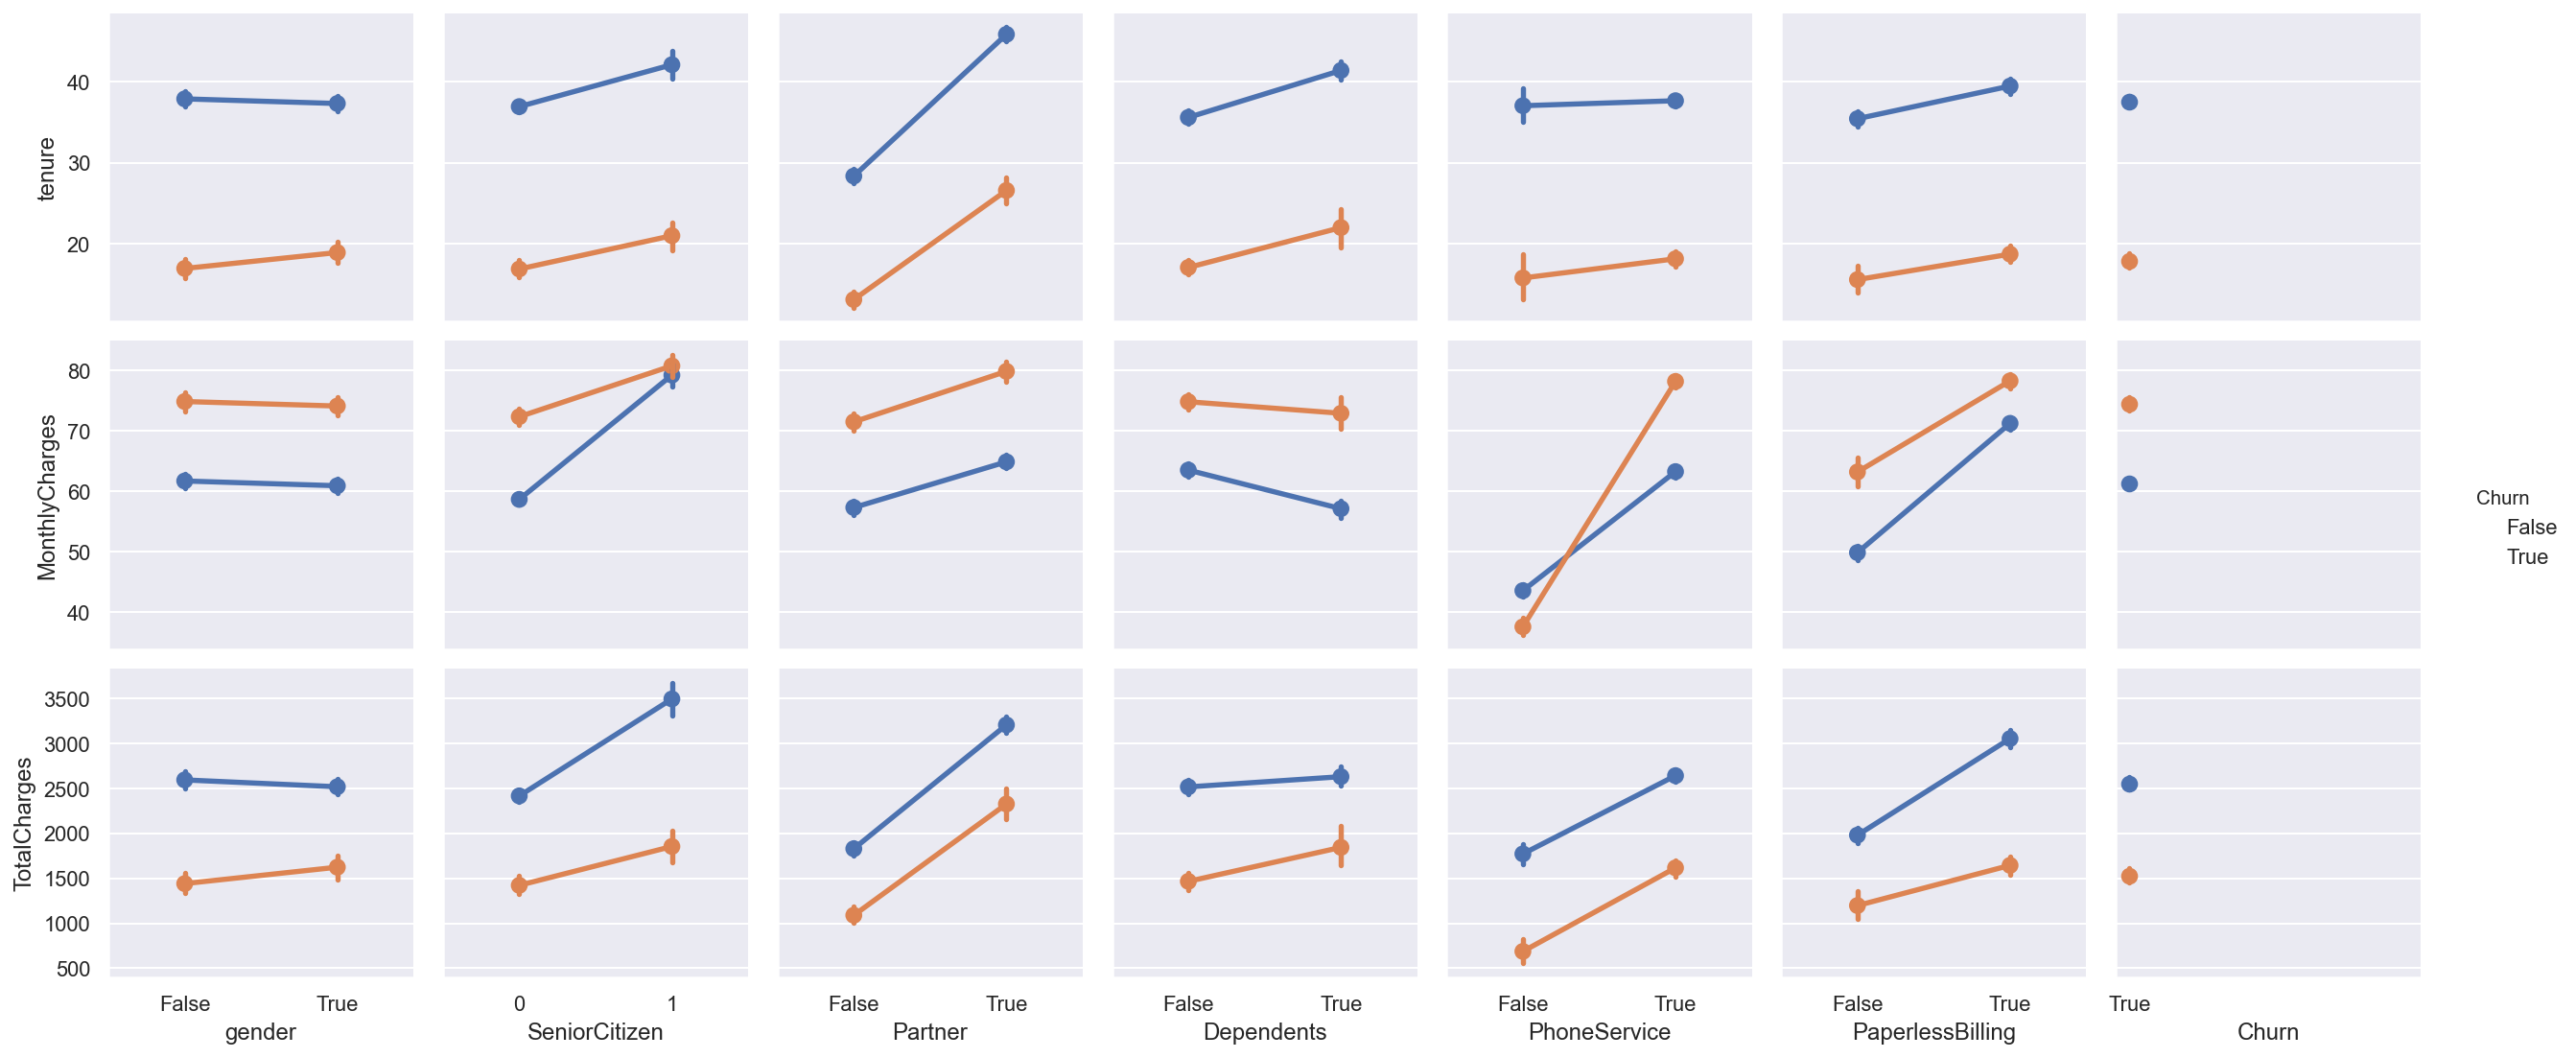

In [37]:
g = sns.PairGrid(data=df, x_vars=bi_cols, y_vars=num_cols, hue="Churn")
g.map(sns.pointplot)
g.add_legend()

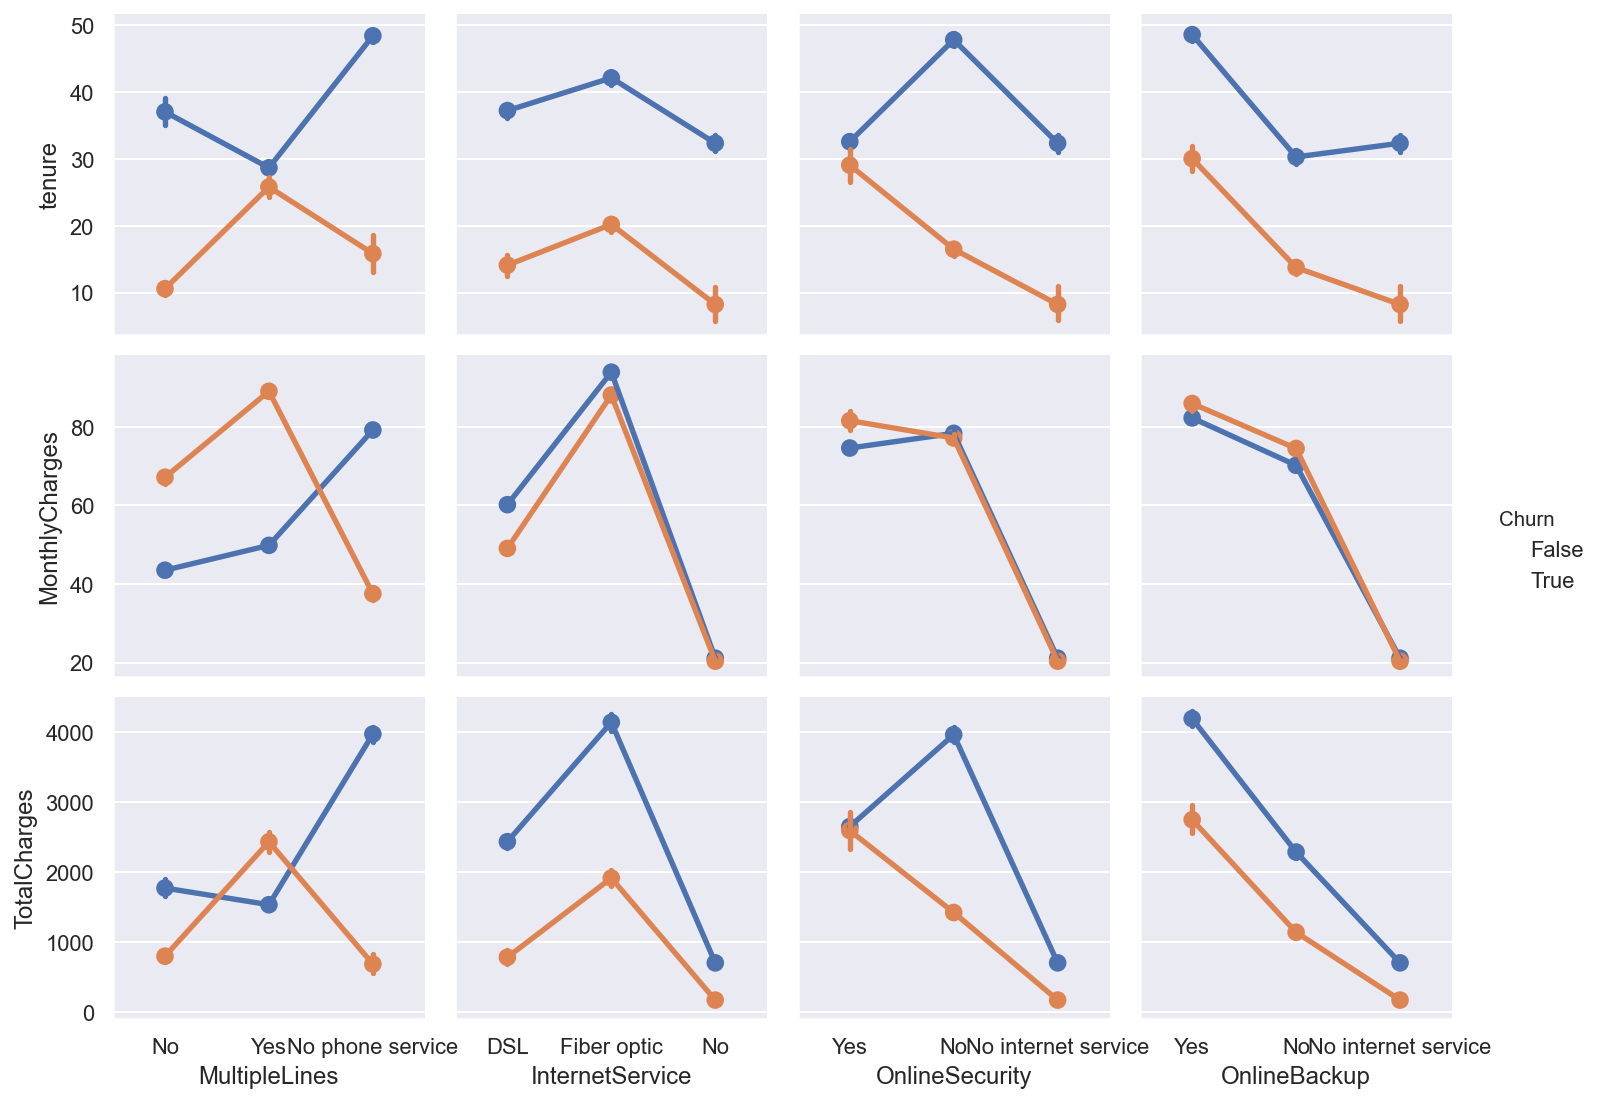

In [38]:
g = sns.PairGrid(data=df, x_vars=cat_cols[:4], y_vars=num_cols, hue="Churn")
g.map(sns.pointplot)
g.add_legend()

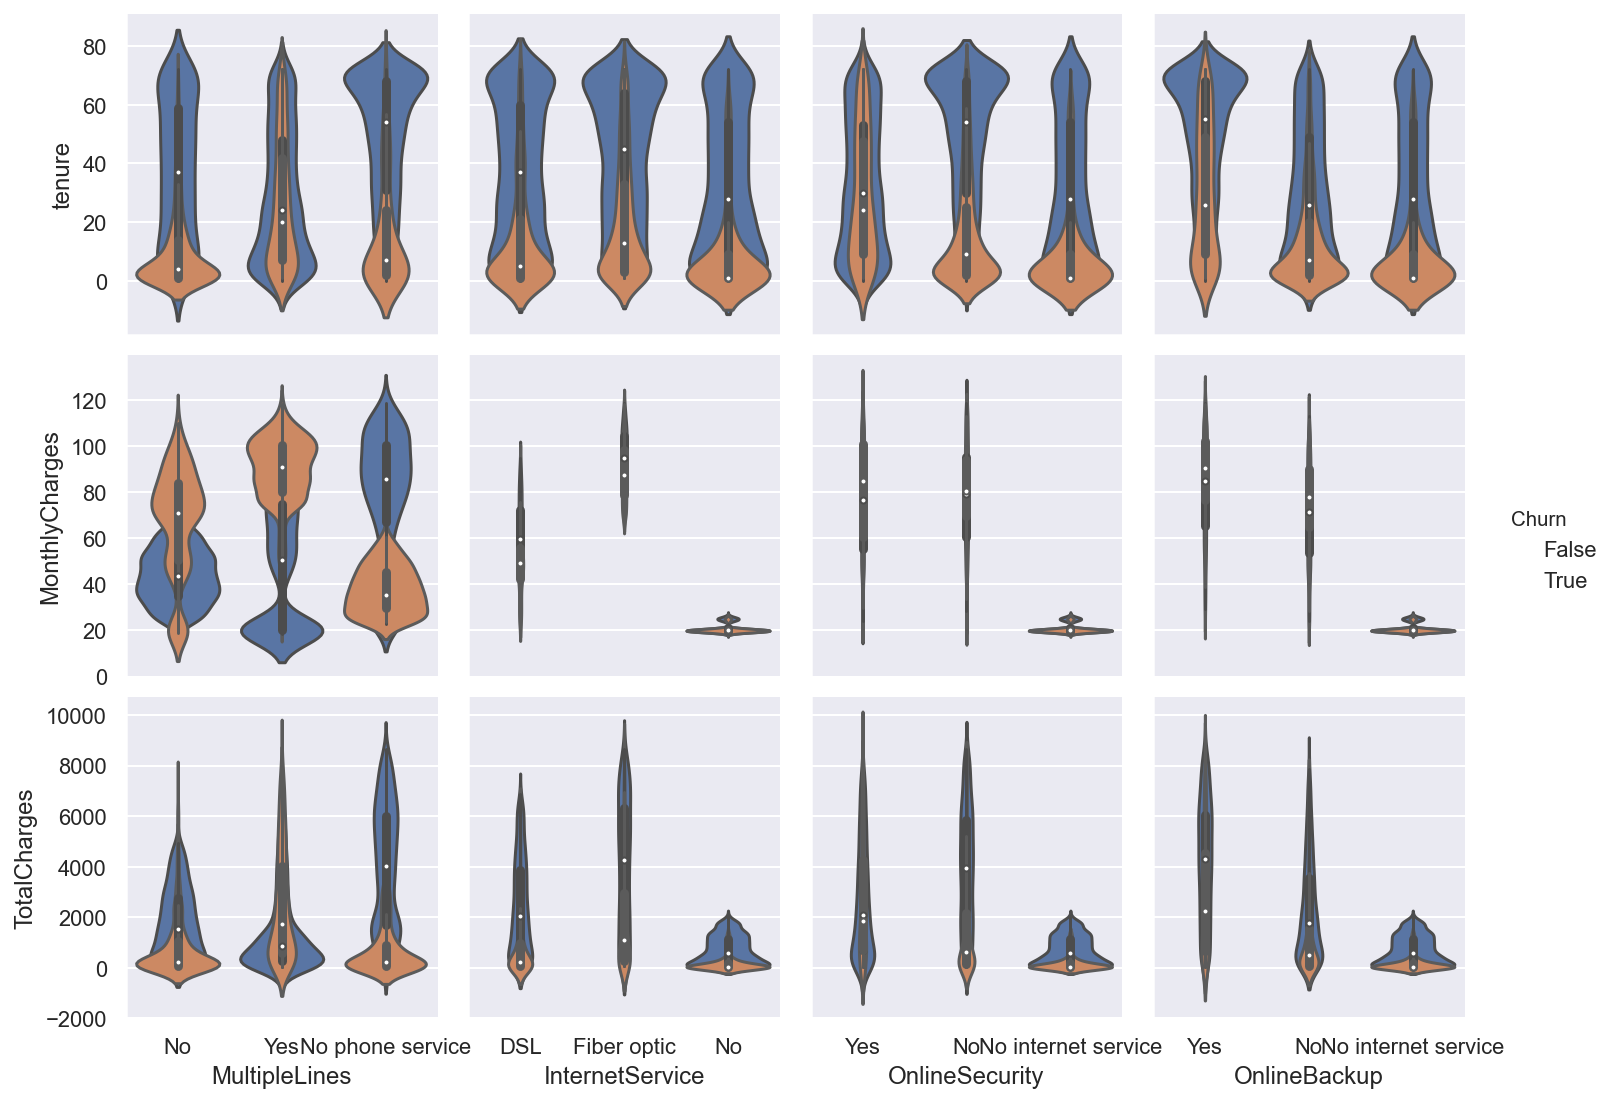

In [39]:
g = sns.PairGrid(data=df, x_vars=cat_cols[:4], y_vars=num_cols, hue="Churn")
g.map(sns.violinplot, alpha=.5)
g.add_legend()

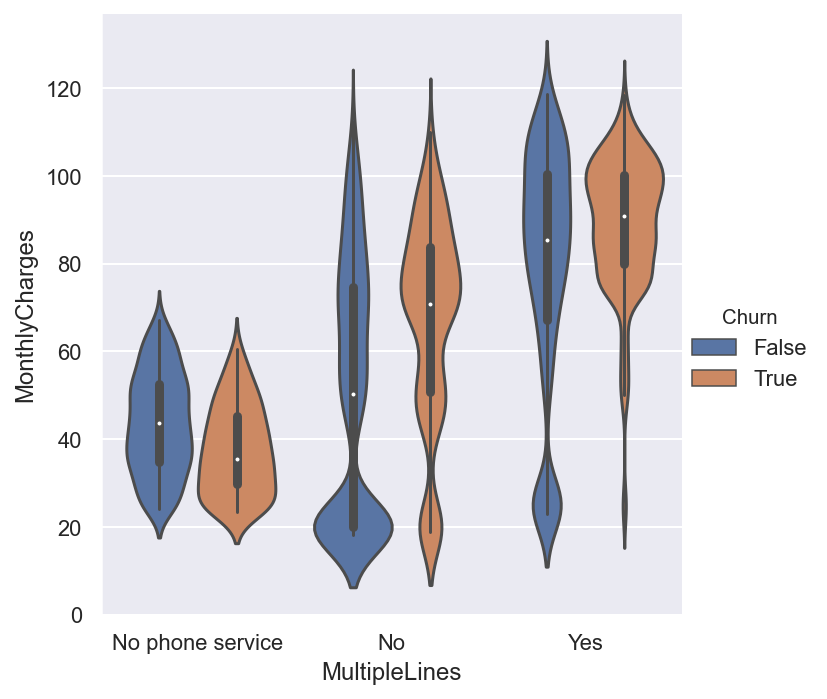

In [40]:
sns.catplot(data=df, x="MultipleLines", y="MonthlyCharges", hue="Churn", 
            kind="violin", ci=None)

### One Hot Encoding
* 범주형 데이터 => 수치형 데이터로 변환

In [41]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [42]:
bi_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [43]:
cols = df.columns.tolist()
cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'monthlycharges_group',
 'totalcharges_group',
 'tenure_group']

In [44]:
multi_cols = set(cols) - set(bi_cols) - set(num_cols)
multi_cols = list(multi_cols)
multi_cols.remove("customerID")
multi_cols

['MultipleLines',
 'OnlineSecurity',
 'PaymentMethod',
 'DeviceProtection',
 'OnlineBackup',
 'StreamingTV',
 'InternetService',
 'tenure_group',
 'Contract',
 'monthlycharges_group',
 'TechSupport',
 'StreamingMovies',
 'totalcharges_group']

In [45]:
pd.options.display.max_columns = 55

In [46]:
# 바이너리 데이터를 제외한 범주형 컬럼을 인코딩
df_feature = pd.get_dummies(data = df, columns = multi_cols)
df_feature

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,Contract_Month-to-month,Contract_One year,Contract_Two year,monthlycharges_group_0-30,monthlycharges_group_30-70,monthlycharges_group_70-99,monthlycharges_group_99plus,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,totalcharges_group_0-2k,totalcharges_group_2k-4k,totalcharges_group_4k-6k,totalcharges_group_6kplus
0,7590-VHVEG,False,0,True,False,1,False,True,29.85,29.85,False,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
1,5575-GNVDE,True,0,False,False,34,True,False,56.95,1889.50,False,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
2,3668-QPYBK,True,0,False,False,2,True,True,53.85,108.15,True,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,7795-CFOCW,True,0,False,False,45,False,False,42.30,1840.75,False,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
4,9237-HQITU,False,0,False,False,2,True,True,70.70,151.65,True,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,True,0,True,True,24,True,True,84.80,1990.50,False,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0
7039,2234-XADUH,False,0,True,True,72,True,True,103.20,7362.90,False,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1
7040,4801-JZAZL,False,0,True,True,11,False,True,29.60,346.45,False,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
7041,8361-LTMKD,True,1,True,False,4,True,True,74.40,306.60,True,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0


In [47]:
df_feature.to_csv("data/telco_feature.csv", index=False)

In [48]:
pd.read_csv("data/telco_feature.csv")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,Contract_Month-to-month,Contract_One year,Contract_Two year,monthlycharges_group_0-30,monthlycharges_group_30-70,monthlycharges_group_70-99,monthlycharges_group_99plus,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,totalcharges_group_0-2k,totalcharges_group_2k-4k,totalcharges_group_4k-6k,totalcharges_group_6kplus
0,7590-VHVEG,False,0,True,False,1,False,True,29.85,29.85,False,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
1,5575-GNVDE,True,0,False,False,34,True,False,56.95,1889.50,False,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
2,3668-QPYBK,True,0,False,False,2,True,True,53.85,108.15,True,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,7795-CFOCW,True,0,False,False,45,False,False,42.30,1840.75,False,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
4,9237-HQITU,False,0,False,False,2,True,True,70.70,151.65,True,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,True,0,True,True,24,True,True,84.80,1990.50,False,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0
7039,2234-XADUH,False,0,True,True,72,True,True,103.20,7362.90,False,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1
7040,4801-JZAZL,False,0,True,True,11,False,True,29.60,346.45,False,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
7041,8361-LTMKD,True,1,True,False,4,True,True,74.40,306.60,True,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
